### Sample dataset assignment 3 Answer
#### author: "Shubham jagtap"
##### date: "10/16/2019"

### 1. Statistics of values per month (i.e. max, min, mean, total, percentage, etc) 
(only for the destination LAX,BWI,ROC,DCA,PHL,DAY,GRR,SMF,BZN,CHO)
    1. dep_delay, arr_delay, air_time, distance, etc
    2. flights count per origins, dest places.
    3. find out the most and least dep and arrival delay for month, carrier, dest and origin.

In [1]:
options(warn=-1) # to remove the warnings

In [2]:
# importing libraries
# pacman::p_load(tidyverse, dplyr, ggplot2, plotly, shiny, shinydashboard, leaflet, stringr, lubridate, rmarkdown, knitr)

In [3]:
# library(nycflights13)
data <- nycflights13::flights # nrow(data) = 336776
head(data)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


##### 1. stats of dep_delay, arr_delay, air_time, distance, etc

In [14]:
library(dplyr)
statsset <- data %>% filter(dest== c('LAX','BWI','ROC','DCA','PHL','DAY','GRR','SMF','BZN','CHO'))
# colnames(statsset) 
statsset$month <- as.factor(statsset$month)

# max, min, mean, total, percentage
summary <- list(
alltotal <- statsset  %>% select(2,6,9,15,16)  %>% group_by(month) %>% 
            summarise(totAD = sum(arr_delay, na.rm=T),totDP = sum(dep_delay, na.rm=T),totAT = sum(air_time, na.rm=T),totDIST = sum(distance, na.rm=T) )
,
allmax <- statsset  %>% select(2,6,9,15,16)  %>% group_by(month) %>% 
            summarise(maxAD = max(arr_delay, na.rm=T),maxDP = max(dep_delay, na.rm=T),maxAT = max(air_time, na.rm=T),maxDIST = max(distance, na.rm=T) )
,
allmin <- statsset  %>% select(2,6,9,15,16)  %>% group_by(month) %>% 
            summarise(minAD = min(arr_delay, na.rm=T),minDP = min(dep_delay, na.rm=T),minAT = min(air_time, na.rm=T),minDIST = min(distance, na.rm=T) )
,
allmean <- statsset  %>% select(2,6,9,15,16)  %>% group_by(month) %>% 
            summarise(meanAD = mean(arr_delay, na.rm=T),meanDP = mean(dep_delay, na.rm=T),meanAT = mean(air_time, na.rm=T),meanDIST = mean(distance, na.rm=T) )
)
names(summary) <- c('alltotal','allmax','allmin','allmean')
summary
# unique(statsset$month)
# class(summary$dep_delay)

month,totAD,totDP,totAT,totDIST
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1123,2255,42010,286757
2,1393,3134,42028,307110
3,985,3482,54018,380458
4,1461,2790,50641,359165
5,1036,4333,54600,403987
6,5742,5826,52028,380795
7,4592,6052,51023,388663
8,1956,3945,56771,425690
9,-1183,1474,50414,381196


#### 2. flights count per origins, dest places.

In [5]:
# colnames(statsset)

cpo <- statsset %>% group_by(origin) %>% summarise(total = sum(flight)) # count per origin
cpd <- statsset %>% group_by(dest) %>% summarise(total = sum(flight)) # count per dest

datatotsumflights <- sum(data$flight)
print(datatotsumflights) # count of all flights in dataset
totsumflights <- sum(statsset$flight)
print(totsumflights) # count of all flights in subset

cpd$perc <- round((cpd$total/totsumflights)*100,2)

print(cpd)
print(cpo)

[1] 664096549
[1] 6684724
# A tibble: 10 x 3
   dest    total  perc
   <chr>   <int> <dbl>
 1 BWI    718342 10.8 
 2 BZN      3664  0.05
 3 CHO     16303  0.24
 4 DAY    654027  9.78
 5 DCA   3043143 45.5 
 6 GRR    369618  5.53
 7 LAX    898210 13.4 
 8 PHL    438590  6.56
 9 ROC    539678  8.07
10 SMF      3149  0.05
# A tibble: 3 x 2
  origin   total
  <chr>    <int>
1 EWR    2441247
2 JFK    2692140
3 LGA    1551337


#### 3. find out the most and least dep and arrival delay for month, carrier, dest and origin.

In [6]:
# colnames(statsset)
# for most and least dep delay
val3 <- rbind(
statsset[which.max(statsset$dep_delay), c("month", "carrier", "dest", "origin")],
statsset[which.min(statsset$dep_delay), c("month", "carrier", "dest", "origin")],
# for most and least arrival delay
statsset[which.max(statsset$arr_delay), c("month", "carrier", "dest", "origin")],
statsset[which.min(statsset$arr_delay), c("month", "carrier", "dest", "origin")])

val3$value <- c('max_dep_delay', 'min_dep_delay', 'max_arr_delay', 'min_arr_delay' )
print(val3[c(5,1,4,2,3)])

# A tibble: 4 x 5
  value         month origin carrier dest 
  <chr>         <fct> <chr>  <chr>   <chr>
1 max_dep_delay 1     JFK    MQ      BWI  
2 min_dep_delay 4     JFK    9E      ROC  
3 max_arr_delay 1     JFK    MQ      BWI  
4 min_arr_delay 5     EWR    UA      LAX  


### 2. Visualization (only for the carrier YV, WN, US & B6)
    1. Prepare the scatterplot of dep_delay, arr_delay
    2. Histogram of statistics data as per month.
    3. Prepare verious plots.

#### 1. Prepare the scatterplot of dep_delay, arr_delay

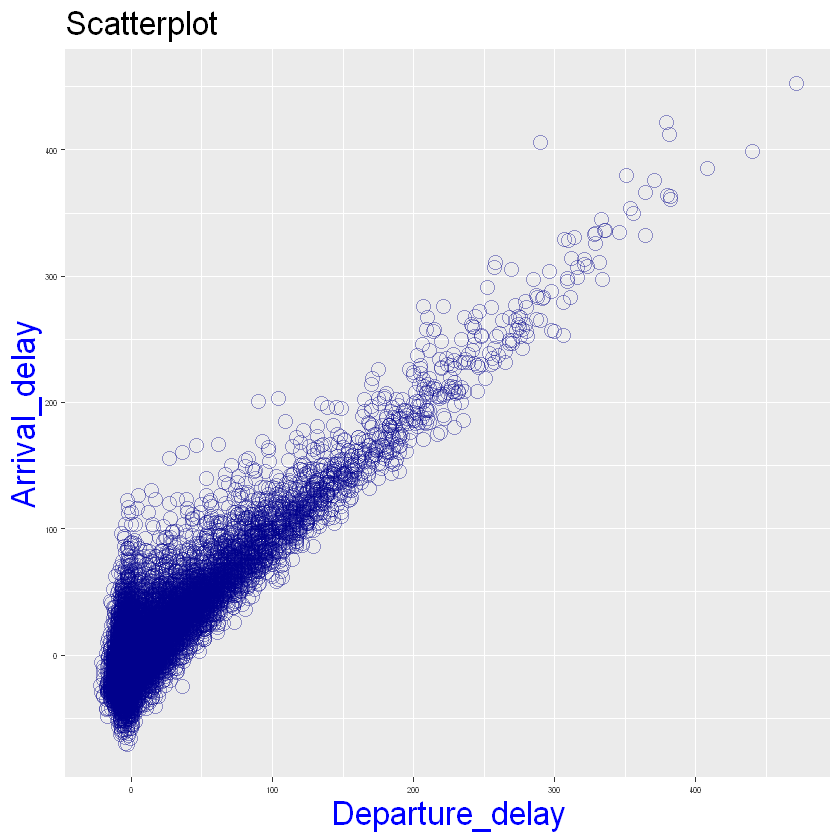

In [13]:
scatterplot <- data[data$carrier==c('YV', 'WN', 'US', 'B6'),]
library(ggplot2)
library(plotly)
pl1<- ggplot(scatterplot,aes(x=dep_delay,y=arr_delay),na.rm=T) + 
      geom_point(col="darkblue",size=4,shape=1, alpha=0.4)+
      xlab("Departure_delay") + ylab("Arrival_delay") +   ggtitle("Scatterplot")
pl2 <- pl1 +  theme(
    axis.title.x = element_text(colour="Blue", size=20),
    axis.title.y = element_text(colour="Blue", size=20),
    axis.text.x = element_text(size=5),
    axis.text.y = element_text(size=5),
    plot.title = element_text(size=20))

print(pl2)

### 3. Regression and clustering models
    1. relation between dep_delay and arr_delay
    2. dep_ time vs dep_delay
    3. arr_time vs arr_delay
    4. distance vs airtime

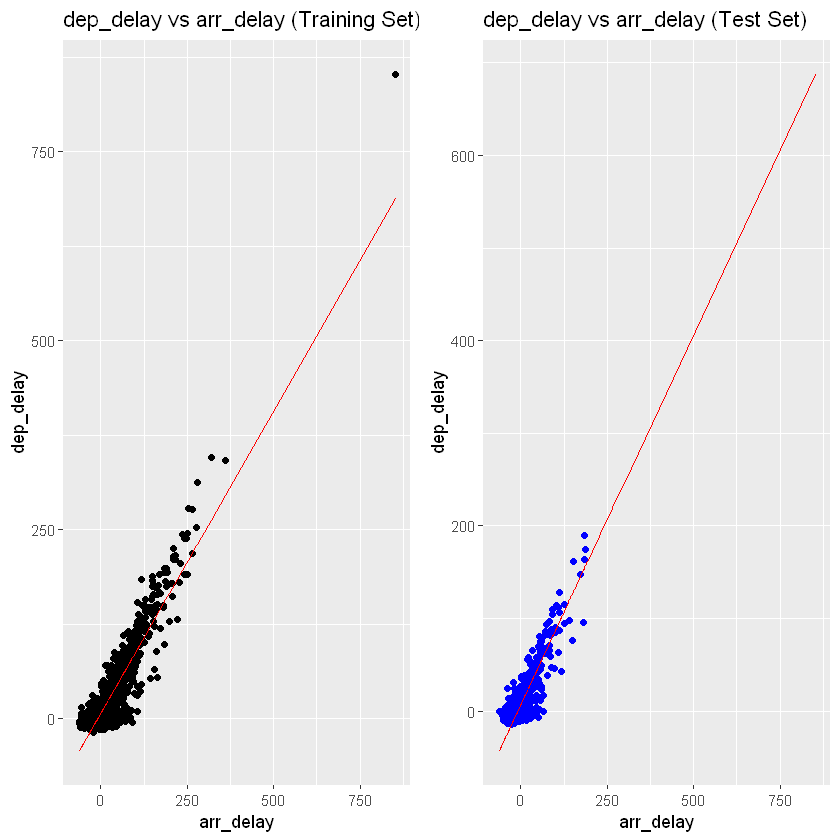

In [12]:
### Simple Linear Regression between dep_delay and arr_delay
library(caTools)
library(dplyr)
library(gridExtra)
set.seed(123)
statsset1 <- statsset[,c(1:9)]
statsset1 <- statsset1[!is.na(statsset1$arr_delay),]

# Splitting the dataset into the Train set and Test set
sample_set <- sample.split(statsset1$dep_delay, SplitRatio = 0.75)
train_set <- subset(statsset1, sample_set == TRUE)
test_set <- subset(statsset1, sample_set == FALSE)


# Creating the Regressor and fitting it with Training Set
regressor = lm(formula = dep_delay ~ arr_delay, data = train_set)

# Predicting the values for test set
y_pred = predict(regressor, newdata = test_set)

# Visualizing train set predictions
library(ggplot2)   # importing the library
training_set_plot <- ggplot() +
  geom_point(aes(x = train_set$arr_delay, y = train_set$dep_delay), colour = 'black') +
  geom_line(aes(x = train_set$arr_delay, y = predict(regressor, newdata = train_set)),colour = 'red') +
  ggtitle('dep_delay vs arr_delay (Training Set)') + xlab('arr_delay') + ylab('dep_delay')

# Visualizing test set predictions
test_set_plot <- ggplot() +
  geom_point(aes(x = test_set$arr_delay, y = test_set$dep_delay), colour = 'blue') +
  geom_line(aes(x = train_set$arr_delay, y = predict(regressor, newdata = train_set)),colour = 'red') +
  ggtitle('dep_delay vs arr_delay (Test Set)') + xlab('arr_delay') + ylab('dep_delay')

par(mfrow=c(1,2))
grid.arrange(training_set_plot, test_set_plot, nrow = 1)

[1] "dep_time"  "dep_delay"

[1] "dep_time"  "dep_delay"

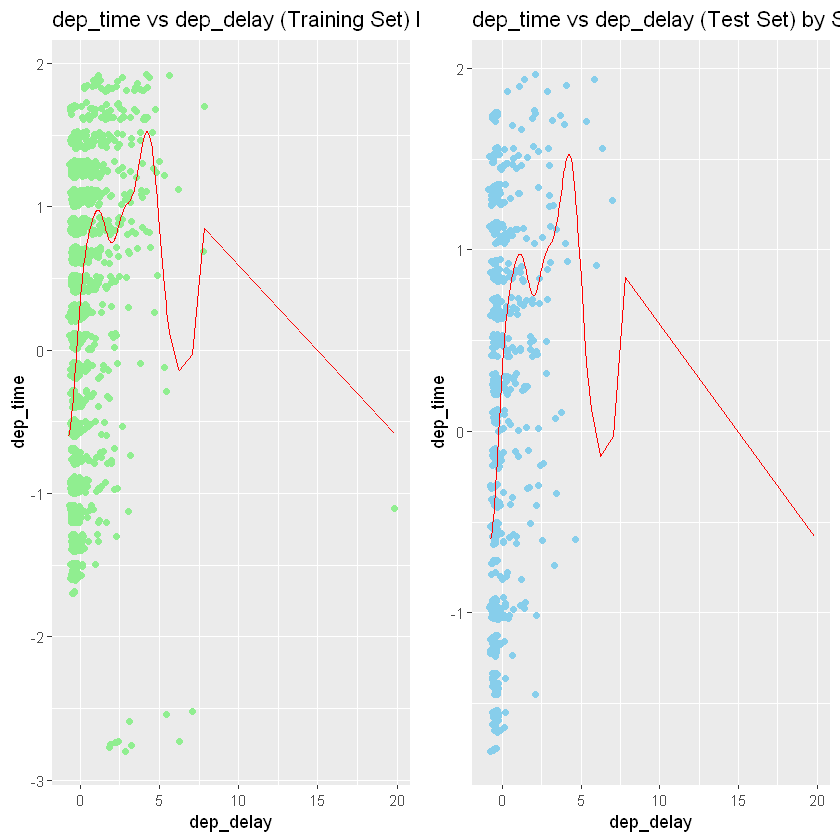

In [11]:
#### Support Vector Regression of dep_time vs dep_delay
library(caTools)
library(dplyr)
library(gridExtra)
set.seed(123)
statsset1 <- statsset[,c('dep_time' , 'dep_delay')]
colnames(statsset1)
statsset1 <- statsset1[!is.na(statsset1$dep_time),]
# statsset1[is.na(statsset1$dep_time),]
# statsset1[is.na(statsset1$dep_delay),]

# Splitting the dataset into the Train set and Test set
sample_set <- sample.split(statsset1$dep_delay, SplitRatio = 0.75)
train_set <- subset(statsset1, sample_set == TRUE)
test_set <- subset(statsset1, sample_set == FALSE)

# Feature Scaling
train_set = tbl_df(scale(train_set))
test_set = tbl_df(scale(test_set))

colnames(train_set)
library(e1071) #importing the library
# Creating the Regressor and fitting it with Training Set
svm_regressor = svm(formula = train_set$dep_time ~ train_set$dep_delay, type = 'eps-regression', kernel = 'radial')

# Predicting the values for test set
svm_y_pred = predict(svm_regressor, newdata = test_set)

# Visualizing train set predictions
library(ggplot2)   # importing the library
svm_training_set_plot <- ggplot() +
  geom_point(aes(x = train_set$dep_delay, y = train_set$dep_time), colour = 'lightgreen') +
  geom_line(aes(x = train_set$dep_delay, y = predict(svm_regressor, newdata = train_set)),colour = 'red') +
  ggtitle('dep_time vs dep_delay (Training Set) by SVM Regression') + xlab('dep_delay') + ylab('dep_time')

# length(predict(svm_regressor, newdata = train_set))
# Visualizing test set predictions
svm_test_set_plot <- ggplot() +
  geom_point(aes(x = test_set$dep_delay, y = test_set$dep_time), colour = 'skyblue') +
  geom_line(aes(x = train_set$dep_delay, y = predict(svm_regressor, newdata = train_set)),colour = 'red') +
  ggtitle('dep_time vs dep_delay (Test Set) by SVM Regression') + xlab('dep_delay') + ylab('dep_time')

par(mfrow=c(1,2))
grid.arrange(svm_training_set_plot, svm_test_set_plot, nrow = 1)

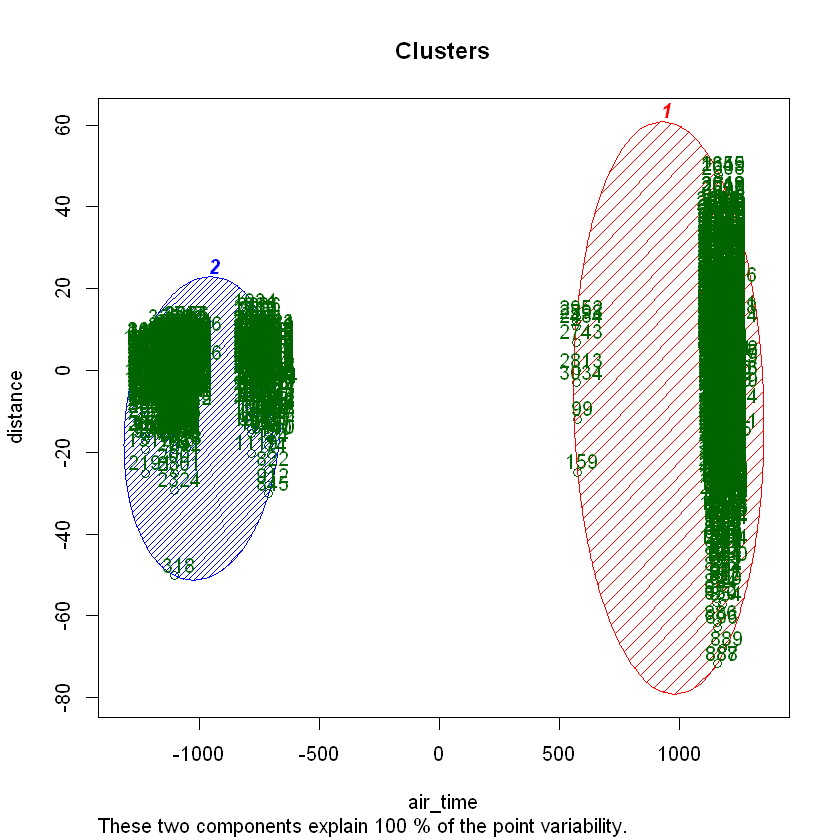

In [10]:
# K-Means Clustering distance vs airtime
dataset2 <-  statsset[,c('distance' , 'air_time')]
dataset2 <- tbl_df(dataset2)
dataset2 <- dataset2[!is.na(dataset2$air_time),]
# dataset2 <- scale(dataset2)
# Splitting the dataset into the Training set and Test set
library(caTools)
set.seed(123)
split <- sample.split(dataset2$distance, SplitRatio = 0.8)
training_set<- subset(dataset2, split == TRUE)
test_set<- subset(dataset2, split == FALSE)
pacman::p_load(factoextra, NbClust, cluster ) 
# Feature Scaling
training_set = scale(training_set)
test_set = scale(test_set)

pacman::p_load(factoextra, NbClust, cluster)  
#library("NbClust")
# Silhouette method to find the optimal number of clusters
# https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/
# fviz_nbclust(dataset2, kmeans, method = "silhouette")+
#  labs(subtitle = "Silhouette method")

library(cluster)
# Fitting K-Means to the dataset
set.seed(29)
kmeans = kmeans(x = dataset2, centers = 2)
y_kmeans = kmeans$cluster

# Visualising the clusters
library(cluster)
clusplot(dataset2, y_kmeans, lines = 0, shade = TRUE, color = TRUE, labels = 2, plotchar = FALSE, span = TRUE,
         main = paste('Clusters'), xlab = 'air_time', ylab = 'distance')